In [1]:
!ls

sample_data


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd 'drive/MyDrive/TA-10/'

/content/drive/MyDrive/TA-10


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping
%matplotlib inline
from keras.preprocessing.text import Tokenizer
import tensorflow as tf
from keras.metrics import Recall
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Read Dataset
df = pd.read_csv('dataset/datasetClean.csv')
df.head().T

,0,1,2,3,4
Sentence,/dvwa/vulnerabilities/csrf/,/dvwa/instructions.php?doc=readme,/dvwa/instructions.php,/dvwa/instructions.php?doc=PHPIDS-license,/dvwa/vulnerabilities/exec/
Type,0,0,0,0,0


In [ ]:
def barPlotLabel(themeStyle, themePalette, xlabel, ylabel, title):
  # Set Theme
  sns.set_theme(style=themeStyle)
  # Count For Type Column, and Set Bar Theme
  sns.countplot(df.Type, palette=themePalette)
  # Give Name X Label
  plt.xlabel(xlabel)
  # Give Name Y Label
  plt.ylabel(ylabel)
  # Set Title
  plt.title(title)
  plt.savefig('label/label.png')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


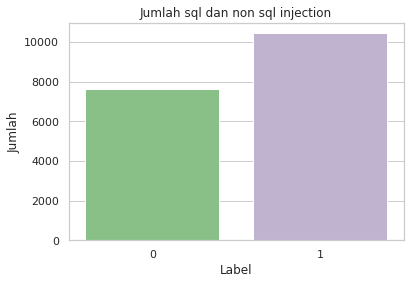

In [ ]:
barPlotLabel("whitegrid", "Accent", "Label", "Jumlah", "Jumlah sql dan non sql injection")

In [ ]:
X=df['Sentence']
y=df['Type']

In [ ]:
word = df['Sentence']
word.tail()

18045                           v_attr4 VARCHAR2 ( 4000 ) 
18046                           v_attr5 VARCHAR2 ( 4000 ) 
18047                           v_command VARCHAR2 ( 32 ) 
18048                       variable name varchar2 ( 30 ) 
18049    with agents ( name, salary )  as   (  (  selec...
Name: Sentence, dtype: object

In [ ]:
# Get Only Alphabet Characters
def GOAC(dataframe):
  dataframe = dataframe.str.replace('[^a-zA-Z]', ' ', regex=True)
  return dataframe

In [ ]:
word = GOAC(word)
word

0                               dvwa vulnerabilities csrf 
1                         dvwa instructions php doc readme
2                                    dvwa instructions php
3                 dvwa instructions php doc PHPIDS license
4                               dvwa vulnerabilities exec 
                               ...                        
18045                           v attr  VARCHAR           
18046                           v attr  VARCHAR           
18047                           v command VARCHAR         
18048                       variable name varchar         
18049    with agents   name  salary    as         selec...
Name: Sentence, Length: 18050, dtype: object

In [ ]:
# Remove Mutiple Space
def RMS(dataframe):
  dataframe = dataframe.replace(r'\s+', ' ', regex=True)
  return dataframe

In [ ]:
word = RMS(word)
word

0                               dvwa vulnerabilities csrf 
1                         dvwa instructions php doc readme
2                                    dvwa instructions php
3                 dvwa instructions php doc PHPIDS license
4                               dvwa vulnerabilities exec 
                               ...                        
18045                                      v attr VARCHAR 
18046                                      v attr VARCHAR 
18047                                   v command VARCHAR 
18048                               variable name varchar 
18049    with agents name salary as select name salary ...
Name: Sentence, Length: 18050, dtype: object

In [ ]:
# Remove First Space
def RFS(dataframe):
  dataframe = dataframe.str.strip()
  return dataframe

In [ ]:
word = RFS(word)

In [ ]:
word.head()

0                   dvwa vulnerabilities csrf
1            dvwa instructions php doc readme
2                       dvwa instructions php
3    dvwa instructions php doc PHPIDS license
4                   dvwa vulnerabilities exec
Name: Sentence, dtype: object

In [ ]:
# Get Length Uniq Word
max_words = len(list(word.str.split(' ', expand=True).stack().unique()))
max_words

24098

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [ ]:
np.savetxt("dataset/sequences_matrix.csv", sequences_matrix, delimiter=",")

In [ ]:
X_train.to_csv('dataset/X_train.csv',index=True)

In [ ]:
y_train.to_csv('dataset/y_train.csv',index=True)

In [ ]:
from keras.models import Sequential
model = Sequential()
model.add(Embedding(max_words,64,input_length=max_len))
model.add(LSTM(64))
model.add(Dense(1,activation="sigmoid"))
model.summary()
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 64)           1542272   
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 1,575,361
Trainable params: 1,575,361
Non-trainable params: 0
_________________________________________________________________


In [ ]:
callbacks = EarlyStopping(monitor='val_loss',min_delta=0.0001,patience=3)
history = model.fit(sequences_matrix,y_train,batch_size=128,epochs=50, 
          validation_split=0.2,callbacks=[callbacks])

Epoch 1/50
91/91 [==============================] - 22s 213ms/step - loss: 0.3076 - accuracy: 0.8962 - val_loss: 0.0951 - val_accuracy: 0.9720
Epoch 2/50
91/91 [==============================] - 18s 203ms/step - loss: 0.0451 - accuracy: 0.9861 - val_loss: 0.0392 - val_accuracy: 0.9882
Epoch 3/50
91/91 [==============================] - 19s 210ms/step - loss: 0.0179 - accuracy: 0.9957 - val_loss: 0.0529 - val_accuracy: 0.9823
Epoch 4/50
91/91 [==============================] - 19s 210ms/step - loss: 0.0113 - accuracy: 0.9977 - val_loss: 0.0257 - val_accuracy: 0.9920
Epoch 5/50
91/91 [==============================] - 19s 211ms/step - loss: 0.0067 - accuracy: 0.9980 - val_loss: 0.0189 - val_accuracy: 0.9934
Epoch 6/50
91/91 [==============================] - 20s 223ms/step - loss: 0.0046 - accuracy: 0.9985 - val_loss: 0.0160 - val_accuracy: 0.9948
Epoch 7/50
91/91 [==============================] - 19s 207ms/step - loss: 0.0036 - accuracy: 0.9987 - val_loss: 0.0158 - val_accuracy: 0.9952

In [ ]:
def lineChartAccuracy():
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(1, len(val_acc)+1)
  plt.figure(figsize=(12, 4))

  plt.subplot(1, 2, 1)
  plt.plot(acc, label='Training', marker='o')
  plt.plot(val_acc, label='Validation', marker='o')
  plt.legend(loc='lower right')
  plt.title('Accuracy')
  plt.grid()

  plt.subplot(1, 2, 2)
  plt.plot(loss, label='Training', marker='o')
  plt.plot(val_loss, label='Validation', marker='o')
  plt.legend(loc='upper right')
  plt.title('Loss')
  plt.grid()
  plt.savefig('accuracy/accuracy.png')
  plt.show()

452/452 [==============================] - 11s 23ms/step - loss: 0.0046 - accuracy: 0.9986
Test set
  Loss: 0.005
  Accuracy: 0.999


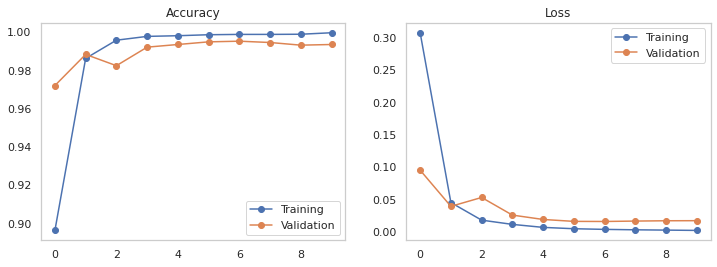

In [ ]:
accr = model.evaluate(sequences_matrix,y_train)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))
# Call lineChartAccuracy function
lineChartAccuracy()

In [ ]:
X_test_sequences = tok.texts_to_sequences(X_test)
X_test_sequences_matrix = sequence.pad_sequences(X_test_sequences,maxlen=max_len)

In [ ]:
y_pred=model.predict(X_test_sequences_matrix)

In [ ]:
print(y_pred)

[[9.9997747e-01]
 [9.9641454e-01]
 [2.8559716e-05]
 ...
 [9.9998641e-01]
 [9.9642301e-01]
 [7.1060487e-05]]


In [ ]:
for i in range(len(y_pred)):
  if y_pred[i]>0.5:
    y_pred[i]=1
  elif y_pred[i]<=0.5:
    y_pred[i]=0

In [ ]:
def confusionMatrix(y_test,y_pred,title, cmap):
  labels = ['TN', 'FP', 'FN', 'TP']
  conf_mat = confusion_matrix(y_test, y_pred)
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(conf_mat, annot=labels, fmt='', cmap = cmap)
  plt.title(title)
  plt.savefig('confusion_matrix/confM.png')
  print(conf_mat)

 Accuracy : 0.992797783933518 
 Precision : 0.9913875598086125 
 Recall : 0.9961538461538462
[[1512   18]
 [   8 2072]]


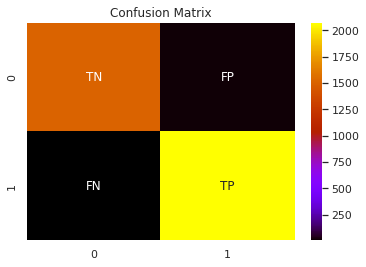

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

accuracy= accuracy_score(y_test, y_pred)
precision= precision_score(y_test, y_pred, zero_division=1)
recall= recall_score(y_test, y_pred, zero_division=1)
print(" Accuracy : {0} \n Precision : {1} \n Recall : {2}".format(accuracy, precision, recall))
# Call confusionMatrix Function
confusionMatrix(y_test,y_pred,"Confusion Matrix", "gnuplot")

In [ ]:
# Save model
model.save('model/lstm_model.h5')
print('model tersimpan')

model tersimpan
